In [0]:
2from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab3_Files/'
filename_ex1 = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab3_Files/ex1.jpg'
filename_ex2 = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab3_Files/ex2.jpg'

ex1.jpg  ex2.jpg  Lab3_Template.ipynb


[[150 150 159 ... 156 155 158]
 [158 154 157 ... 157 156 159]
 [163 155 155 ... 159 159 162]
 ...
 [ 83  84  85 ...  91  95  91]
 [ 86  86  87 ...  93  97  93]
 [ 89  88  89 ...  96 100  96]] 

[[150 150 159 ... 156 155 158]
 [158 154 157 ... 157 156 159]
 [163 155 155 ... 159 159 162]
 ...
 [ 83  84  85 ...  91  95  91]
 [ 86  86  87 ...  93  97  93]
 [ 89  88  89 ...  96 100  96]] 



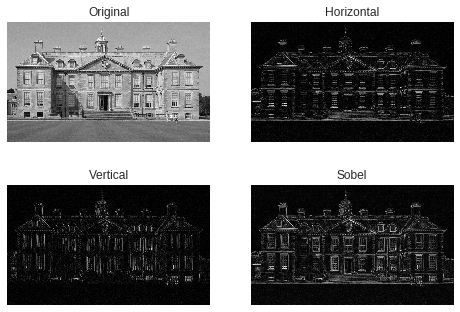

In [0]:
#part1 with skimage
import skimage
import numpy as np
from skimage import io, img_as_ubyte
from matplotlib import pyplot as plt
from skimage.filters import sobel_h,sobel_v,sobel
from skimage.color import rgb2gray
from scipy.signal import convolve2d as conv2

def main():
  #initalization
  img2 = io.imread('/content/gdrive/My Drive/CMPUT 206 Wi19/Lab3_Files/ex2.jpg',as_grey=True)
  print(img2,"\n")
  img2 = rgb2gray(img2)
  print(img2,"\n")
  img2 = skimage.img_as_ubyte(img2, force_copy= False)
  #print(img2,"\n")
  filter2 = []
  Gx = []
  Gy =[]
  #normalization the image
  #img_eq = (img2 - np.amin(img2))/(np.amax(img2)-np.amin(img2))
  #print(img_eq,"\n")

  
  #sobel
  x_kernel = [[-1,0,1],[-2,0,2],[-1,0,1]]
  y_kernel = [[1,2,1],[0,0,0],[-1,-2,-1]]
  #Gx = conv2(img2, x_kernel, 'same')
  #Gy = conv2(img2, y_kernel, 'same')
  #print(Gx,"\n")
  Gx1 = sobel_h(img2)
  Gy1 = sobel_v(img2)
  filter1 = sobel(img2)
  Gx1 = np.absolute(Gx1)
  Gy1 = np.absolute(Gy1)
  #filter1 = np.sqrt(np.power(Gx,2)+np.power(Gy,2))
  #plot
  plt.subplot(221), plt.imshow(img2,'gray'), plt.title('Original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(222), plt.imshow(Gx1,'gray'), plt.title('Horizontal')
  plt.xticks([]), plt.yticks([])
  
  plt.subplot(223), plt.imshow(Gy1,'gray'), plt.title('Vertical')
  plt.xticks([]), plt.yticks([])
  plt.subplot(224), plt.imshow(filter1, 'gray'), plt.title('Sobel')
  plt.xticks([]), plt.yticks([])

  plt.show()
  
if __name__ == "__main__":
    main()

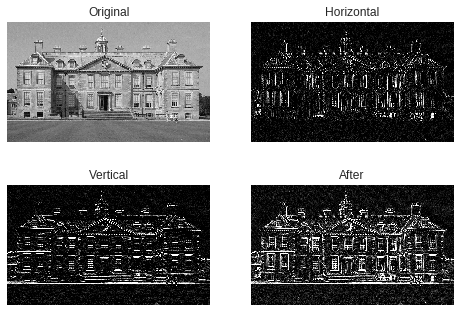

In [0]:
#Your code here
#part1 with cv
import cv2, math
from matplotlib import pyplot as plt
import numpy as np


img2 = cv2.imread('/content/gdrive/My Drive/CMPUT 206 Wi19/Lab3_Files/ex2.jpg',0)
filtered = []
Gx = []
Gy = []

  
# Formula extracted from https://en.wikipedia.org/wiki/Sobel_operator

Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

Gx = cv2.filter2D(img2, -1, Kx)
Gy = cv2.filter2D(img2, -1, Ky)

filtered = cv2.add(Gx, Gy)
       

    
plt.subplot(221), plt.imshow(img2, 'gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(Gx, 'gray'), plt.title('Horizontal')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(Gy, 'gray'), plt.title('Vertical')
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(filtered, 'gray'), plt.title('After')
plt.xticks([]), plt.yticks([])
plt.show()
       




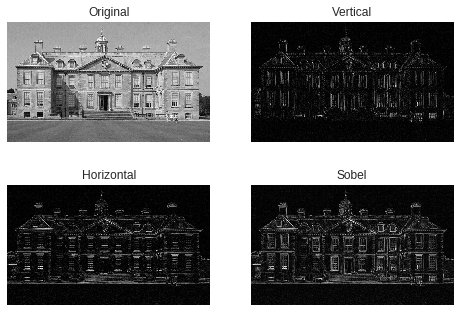

In [0]:
#part1 with skimage
import skimage
import numpy as np
from skimage import io, img_as_ubyte
from matplotlib import pyplot as plt
from skimage.filters import sobel_h,sobel_v,sobel
from skimage.color import rgb2gray
from scipy.signal import convolve2d as conv2

#initalization
img2 = io.imread('/content/gdrive/My Drive/CMPUT 206 Wi19/Lab3_Files/ex2.jpg',as_grey=True)
img2 = skimage.img_as_ubyte(img2, force_copy= False)


def sobel_handle(img2):
  filter1 = []
  Gx = []
  Gy =[]
  #sobel
  x_kernel = [[-1,0,1],[-2,0,2],[-1,0,1]]
  y_kernel = [[1,2,1],[0,0,0],[-1,-2,-1]]

  Gx = conv2(img2, x_kernel, 'same')
  Gy = conv2(img2, y_kernel, 'same')
  #print(Gx,"\n")
  #Gx1 = sobel_h(img2)
  #Gy1 = sobel_v(img2)
  #filter1 = sobel(img2)
  filter1 = np.sqrt(np.power(Gx,2)+np.power(Gy,2))
  Gx = np.absolute(Gx)
  Gy = np.absolute(Gy)
  return Gx, Gy,filter1
def plot(Gx1, Gy1,filter1):
  #plot
  plt.subplot(221), plt.imshow(img2, 'gray'), plt.title('Original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(222), plt.imshow(Gx1, 'gray'), plt.title('Vertical')
  plt.xticks([]), plt.yticks([])
  
  plt.subplot(223), plt.imshow(Gy1, 'gray'), plt.title('Horizontal')
  plt.xticks([]), plt.yticks([])
  plt.subplot(224), plt.imshow(filter1, 'gray'), plt.title('Sobel')
  plt.xticks([]), plt.yticks([])

  plt.show()

def main():
  init()
  
  sobel_handle(img2)
  Gx, Gy,filter1 = sobel_handle(img2)
  
  plot(Gx, Gy,filter1)

if __name__ == "__main__":
  main()

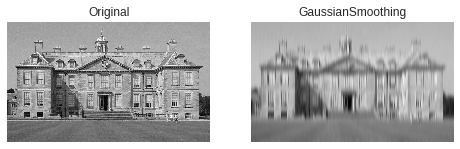

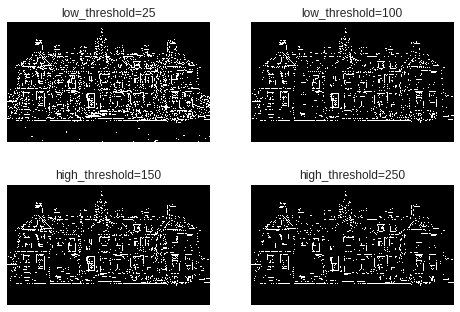

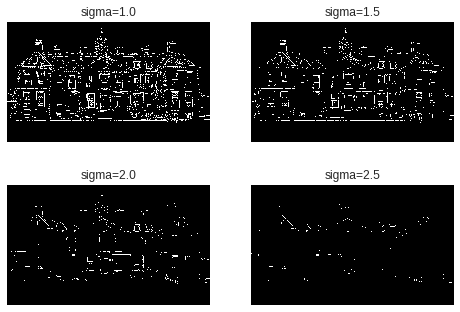

In [0]:
#part2 

import skimage
import numpy as np
from skimage import io, img_as_ubyte
from matplotlib import pyplot as plt
from skimage.filters import sobel_h,sobel_v,sobel
from skimage.color import rgb2gray
from scipy.signal import convolve2d as conv2
from skimage.filters import gaussian
from scipy import ndimage as ndi
from skimage import feature

#initalization
img = io.imread('/content/gdrive/My Drive/CMPUT 206 Wi19/Lab3_Files/ex2.jpg',as_grey=True)
img = skimage.img_as_ubyte(img2, force_copy= False)
#img_gauss = gaussian(img, sigma=15, multichannel=True)
img_guass = ndi.gaussian_filter(img, 5)
plt.subplot(121), plt.imshow(img, 'gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_gauss, 'gray'), plt.title('GaussianSmoothing')
plt.xticks([]), plt.yticks([])
plt.show()

#sigma =1: low threshold = 25; low threshold = 50; high threshold = 150; high threshold = 200
edges1 = feature.canny(img, sigma=1.0, low_threshold=25, high_threshold=None, mask=None, use_quantiles=False)
edges2 = feature.canny(img, sigma=1.0, low_threshold=100, high_threshold=None, mask=None, use_quantiles=False)
edges3 = feature.canny(img, sigma=1.0, low_threshold=None, high_threshold=150, mask=None, use_quantiles=False)
edges4 = feature.canny(img, sigma=1.0, low_threshold=None, high_threshold=250, mask=None, use_quantiles=False)

plt.subplot(221), plt.imshow(edges1, 'gray'), plt.title('low_threshold=25')
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(edges2, 'gray'), plt.title('low_threshold=100')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(edges3, 'gray'), plt.title('high_threshold=150')
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(edges4, 'gray'), plt.title('high_threshold=25 0')
plt.xticks([]), plt.yticks([])
plt.show()

#fix low_threshold=50 and high_threshold=150 and sigma =  1.0; sigma = 1.5; sigma = 2.0; sigma = 2.5.

edg1 = feature.canny(img, sigma=1.0, low_threshold=50, high_threshold=150, mask=None, use_quantiles=False)
edg2 = feature.canny(img, sigma=1.5, low_threshold=50, high_threshold=150, mask=None, use_quantiles=False)
edg3 = feature.canny(img, sigma=2.0, low_threshold=50, high_threshold=150, mask=None, use_quantiles=False)
edg4 = feature.canny(img, sigma=2.5, low_threshold=50, high_threshold=150, mask=None, use_quantiles=False)

plt.subplot(221), plt.imshow(edg1, 'gray'), plt.title('sigma=1.0')
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(edg2, 'gray'), plt.title('sigma=1.5')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(edg3, 'gray'), plt.title('sigma=2.0')
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(edg4, 'gray'), plt.title('sigma=2.5')
plt.xticks([]), plt.yticks([])
plt.show()